In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
# Import as Dataframe
df = pd.read_csv('Property_Assessment_Data__Historical_ (1).csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,17,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3
0,1070606,2016.0,NaN,4895.0,WRIGHT DRIVE SW,SE 28-51-25-4,NaN,NaN,NaN,WINDERMERE,...,N,DC1,22517.478,0.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
1,1076363,2013.0,NaN,2704.0,YELLOWHEAD TRAIL NE,Plan: 3483KS Lot: A,NaN,NaN,NaN,CLOVER BAR AREA,...,N,IM,6445.169,2177000.0,COMMERCIAL,100.0,NaN,NaN,NaN,NaN
2,1149426,2014.0,NaN,810.0,101 STREET SW,LSD: 1 29-51-24-4,NaN,NaN,NaN,ELLERSLIE INDUSTRIAL,...,N,AGI,14264.766,70500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
3,1152594,2012.0,NaN,17310.0,97 STREET NW,NaN,NaN,NaN,NaN,ELSINORE,...,N,AG,0.000,12500.0,COMMERCIAL,100.0,NaN,NaN,NaN,NaN
4,1153113,2018.0,NaN,8920.0,WINTERBURN ROAD NW,NaN,NaN,NaN,NaN,PIPELINES OIL FIELD,...,N,AG,0.000,257330.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533769 entries, 0 to 533768
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Account Number        533769 non-null  int64  
 1   Assessment Year       533769 non-null  int64  
 2   Suite                 74294 non-null   object 
 3   House Number          523345 non-null  float64
 4   Street Name           523345 non-null  object 
 5   Legal Description     532335 non-null  object 
 6   Latitude              533192 non-null  float64
 7   Longitude             533192 non-null  float64
 8   Point Location        533192 non-null  object 
 9   Neighbourhood         533768 non-null  object 
 10  Actual Year Built     507771 non-null  float64
 11  Garage                533768 non-null  object 
 12  Zoning                533751 non-null  object 
 13  Lot Size              533734 non-null  float64
 14  Assessed Value        533768 non-null  float64
 15  

In [ ]:
df.shape

(601680, 21)

In [ ]:
df_2019=df.copy()
# df_2019.drop(df_2019[df_2019['Assessment Year'] <= 2018].index, inplace = True)
# df_2019["Assessment Year"].unique()

In [ ]:
df_2021 = df_2019[df_2019['Assessment Year'] == 2021]
df_2021.shape

(59100, 21)

In [ ]:
df_2019.isnull().sum()

Account Number               0
Assessment Year              0
Suite                   135890
House Number              3023
Street Name               3023
Legal Description          265
Latitude                   101
Longitude                  101
Point Location             101
Neighbourhood                0
Actual Year Built         7587
Garage                       0
Zoning                      10
Lot Size                     7
Assessed Value               0
Assessment Class 1           0
Assessment Class % 1         0
Assessment Class 2      156865
Assessment Class % 2    156865
Assessment Class 3      157518
Assessment Class % 3    157518
dtype: int64

In [ ]:
df_2019.shape

(157794, 21)

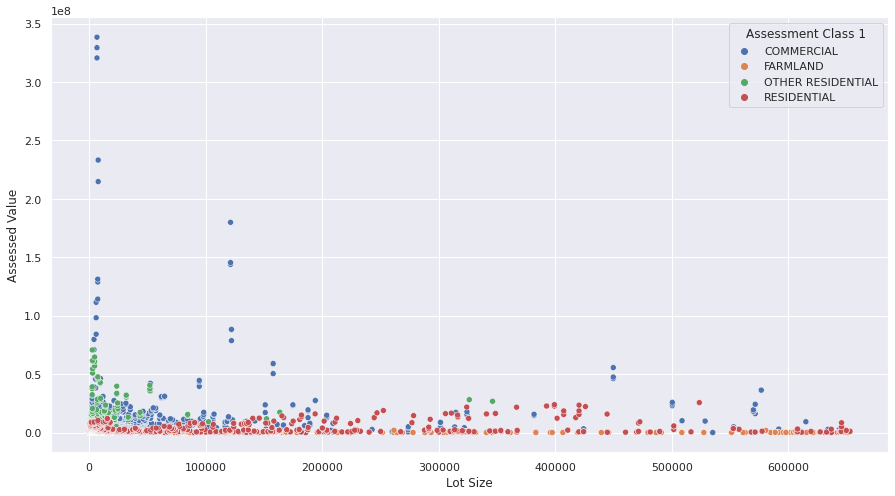

RESIDENTIAL          142355
COMMERCIAL            13105
OTHER RESIDENTIAL      1722
FARMLAND                612
Name: Assessment Class 1, dtype: int64
0.9021572429876928


In [ ]:
#Scatter plot - class, assessed value, lot size (m2)
import matplotlib as mat
sns.set(rc = {'figure.figsize':(15, 8)})
sns.scatterplot(x = "Lot Size", y = "Assessed Value", hue="Assessment Class 1",
                data = df_2019.groupby(['Assessment Class 1']).apply(lambda x: x.sort_values(by = ['Assessed Value'])))

mat.pyplot.show()
# count
print(df_2019['Assessment Class 1'].value_counts())
print(df_2019['Assessment Class 1'].value_counts().RESIDENTIAL/df_2019['Assessment Class 1'].value_counts().sum())

In [ ]:
df_2019[['Assessed Value','Lot Size']].describe()

,Assessed Value,Lot Size
count,1.577940e+05,157787.000000
mean,5.232463e+05,3678.761262
std,2.459437e+06,31903.236557
min,0.000000e+00,0.000000
25%,2.060000e+05,297.553000
50%,3.170000e+05,564.153000
75%,4.125000e+05,686.126000
max,3.383540e+08,652986.985100


In [ ]:
df_2019.drop(df_2019[df_2019['Assessment Class 1'] !='RESIDENTIAL'].index, inplace = True)
df_2019["Assessment Class 1"].unique()
df_2019.shape

(142355, 21)

In [ ]:
df_2021.drop(df_2021[df_2021['Assessment Class 1'] !='RESIDENTIAL'].index, inplace = True)
df_2021["Assessment Class 1"].unique()
df_2021.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(52527, 21)

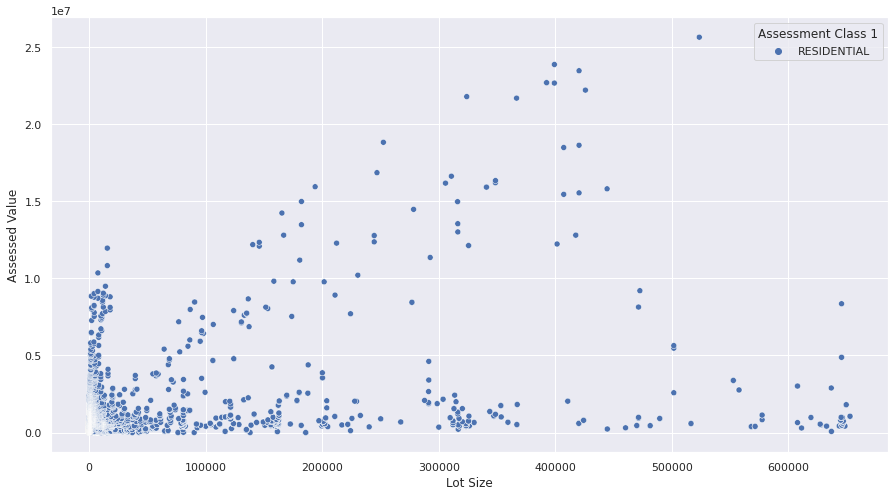

RESIDENTIAL    142355
Name: Assessment Class 1, dtype: int64
1.0


In [ ]:
sns.set(rc = {'figure.figsize':(15, 8)})
sns.scatterplot(x = "Lot Size", y = "Assessed Value", hue="Assessment Class 1",
                data = df_2019.groupby(['Assessment Class 1']).apply(lambda x: x.sort_values(by = ['Assessed Value'])))

mat.pyplot.show()
# count
print(df_2019['Assessment Class 1'].value_counts())
print(df_2019['Assessment Class 1'].value_counts().RESIDENTIAL/df_2019['Assessment Class 1'].value_counts().sum())

In [ ]:
df_2019[['Assessed Value','Lot Size']].describe()

,Assessed Value,Lot Size
count,1.423550e+05,142349.000000
mean,3.584615e+05,1688.875986
std,4.408086e+05,19334.569459
min,0.000000e+00,0.195000
25%,2.115000e+05,267.950000
50%,3.135000e+05,557.111000
75%,3.890000e+05,657.751000
max,2.563650e+07,652986.985100


In [ ]:
df_2019['Garage'].unique()

array([nan])

In [ ]:
garage_map = {'Y': 1, 'N': 0}
df_2019['Garage'] = df_2019['Garage'].map(garage_map)
df_2019

,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3
16,2618007,2021,NaN,10830.0,129 STREET NW,Plan: 3875P Block: 22 Lot: 8,53.55367,-113.54502,POINT (-113.54502 53.55367),WESTMOUNT,...,1,RF1,564.250,480500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
34,9525304,2019,NaN,523.0,101 STREET NW,NW 28-51-24-4,NaN,NaN,NaN,ANTHONY HENDAY SOUTHEAST,...,0,AG,225537.722,918000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
42,10005483,2021,NaN,3301.0,LAKEVIEW ROAD NW,NaN,53.55223,-113.69679,POINT (-113.69679 53.55223),WESTVIEW VILLAGE,...,0,RMH,NaN,49500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
50,10039899,2019,NaN,117.0,RIDGEWAY DRIVE NW,NaN,53.50390,-113.35934,POINT (-113.35934 53.5039),MAPLE RIDGE,...,0,RMH,NaN,99000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
52,10096491,2021,NaN,116.0,OAK WOOD ROAD NW,NaN,53.50431,-113.36335,POINT (-113.36335 53.50431),MAPLE RIDGE,...,0,RMH,NaN,63000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533750,2942456,2020,NaN,13543.0,124B AVENUE NW,Plan: 6013HW Block: 8 Lot: 26,53.58032,-113.56224,POINT (-113.56224 53.58032),DOVERCOURT,...,1,RF1,545.880,277500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
533756,2944452,2021,NaN,13563.0,124A AVENUE NW,Plan: 6013HW Block: 9 Lot: 23,53.57949,-113.56345,POINT (-113.56345 53.57949),DOVERCOURT,...,1,RF1,645.375,328500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
533760,3008588,2021,201.0,4007.0,26 AVENUE NW,Plan: 8420896 Unit: 6,53.45582,-113.40422,POINT (-113.40422 53.45582),BISSET,...,0,RA7,102.030,66000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
533762,3001146,2019,NaN,12615.0,108 AVENUE NW,Plan: 8420017 Unit: 3,53.55237,-113.54071,POINT (-113.54071 53.55237),WESTMOUNT,...,0,RA7,160.838,238500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN


In [ ]:
garage_map = {'Y': 1, 'N': 0}
df_2021['Garage'] = df_2021['Garage'].map(garage_map)
df_2021.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Garage,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3
16,2618007,2021.0,NaN,10830.0,129 STREET NW,Plan: 3875P Block: 22 Lot: 8,53.55367,-113.54502,POINT (-113.54502 53.55367),WESTMOUNT,...,1,RF1,564.25,480500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN
42,10005483,2021.0,NaN,3301.0,LAKEVIEW ROAD NW,NaN,53.55223,-113.69679,POINT (-113.69679 53.55223),WESTVIEW VILLAGE,...,0,RMH,NaN,49500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN


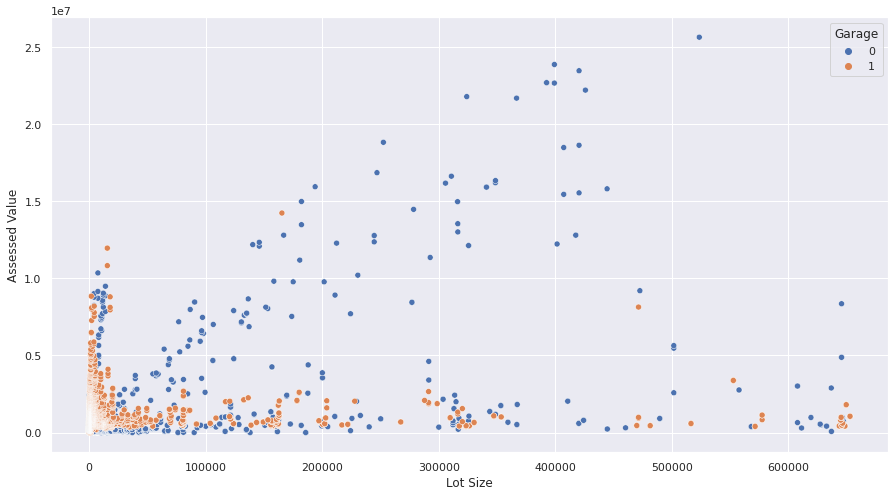

In [ ]:
sns.set(rc = {'figure.figsize':(15, 8)})
sns.scatterplot(x = "Lot Size", y = "Assessed Value", hue="Garage",
                data = df_2019.groupby(['Garage']).apply(lambda x: x.sort_values(by = ['Assessed Value'])))

mat.pyplot.show()

In [ ]:
#number of unique neighbourhood
len(df_2019['Neighbourhood'].unique())

230

In [ ]:
#number of year built
len(df_2019['Actual Year Built'].unique())

119

In [ ]:
# Check for count of missing values
print(df_2019.isnull().sum())

Account Number               0
Assessment Year              0
Suite                   120506
House Number              2775
Street Name               2775
Legal Description           78
Latitude                    28
Longitude                   28
Point Location              28
Neighbourhood                0
Actual Year Built         1602
Garage                       0
Zoning                       4
Lot Size                     6
Assessed Value               0
Assessment Class 1           0
Assessment Class % 1         0
Assessment Class 2      141842
Assessment Class % 2    141842
Assessment Class 3      142140
Assessment Class % 3    142140
dtype: int64


In [ ]:
# # from sklearn.impute import SimpleImputer


df_2019.groupby('Neighbourhood')['Lot Size'].mean()
# df_with_nulls = df_2019.copy()
# df_2019.feature_c = df_with_nulls['Lot Size'].fillna(df_2019.feature_c.mean())
# # # validate that missing vaues were removed
# # print(df.isnull().sum())

# # df = df_with_nulls

# # df.feature_c = SimpleImputer().fit_transform(df_with_nulls.loc[:, ['feature_c']])
# # # validate that missing vaues were removed
# # print(df.isnull().sum())


Neighbourhood
ALBERTA AVENUE                        370.398625
ALDERGROVE                            535.990986
ANTHONY HENDAY                      60055.888008
ANTHONY HENDAY BIG LAKE             68803.450400
ANTHONY HENDAY CASTLEDOWNS           6408.000500
                                       ...      
WINDERMERE                           6770.522589
WINDERMERE AREA                    489281.938100
WINTERBURN INDUSTRIAL AREA WEST     81993.753940
WOODCROFT                             641.778638
YORK                                  448.949500
Name: Lot Size, Length: 230, dtype: float64

In [ ]:
#add age of property
df_2021['Age']=2022-df_2021['Actual Year Built']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

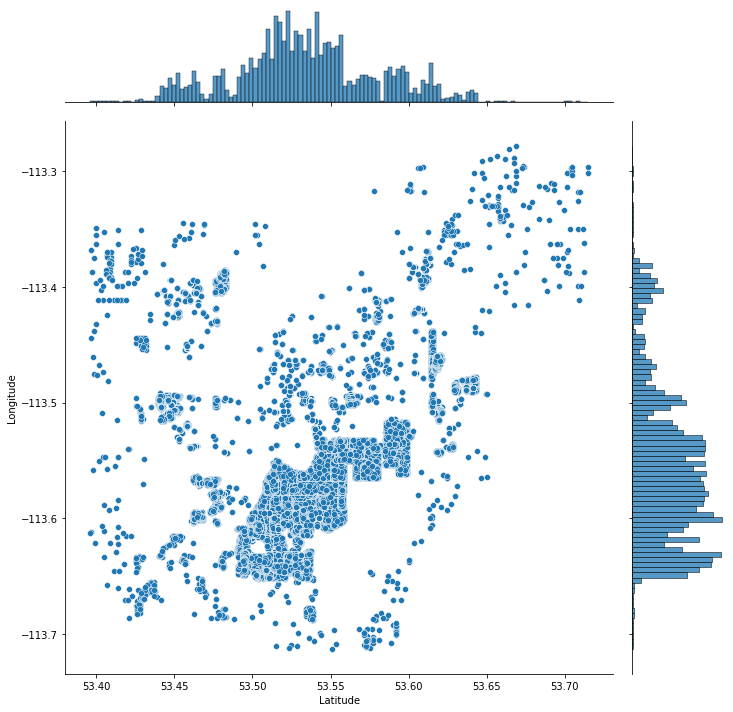

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df_2021['Latitude'],y=df_2021['Longitude'], size=10)
plt.ylabel("Lonitude")
plt.xlabel('Latitude')
plt.show()

In [ ]:
# plt.scatter(df_2019['Point Location'], df_2019['Assessed Value'])
# plt.title('Point Location Vs. Value ')


array(['POINT (-113.54502 53.55367)', nan, 'POINT (-113.69679 53.55223)',
       ..., 'POINT (-113.53886 53.4599)', 'POINT (-113.56111 53.58032)',
       'POINT (-113.55681 53.57383)'], dtype=object)

In [ ]:
df_2019[['Longitude','Latitude']].describe()

,Longitude,Latitude
count,142327.000000,142327.000000
mean,-113.559044,53.535094
std,0.067430,0.043698
min,-113.712580,53.396060
25%,-113.607870,53.510390
50%,-113.569710,53.531570
75%,-113.530850,53.557120
max,-113.278430,53.715070


Text(0.5, 1.0, 'Longitude Vs. Value ')

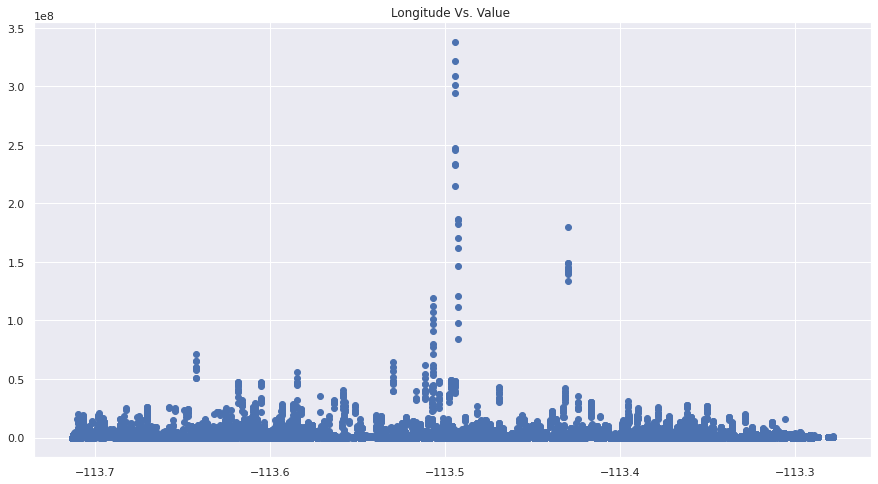

In [ ]:
plt.scatter(df_2019['Longitude'], df_2019['Assessed Value'])
plt.title('Longitude Vs. Value ')

Text(0.5, 1.0, 'Latitude Vs. Value ')

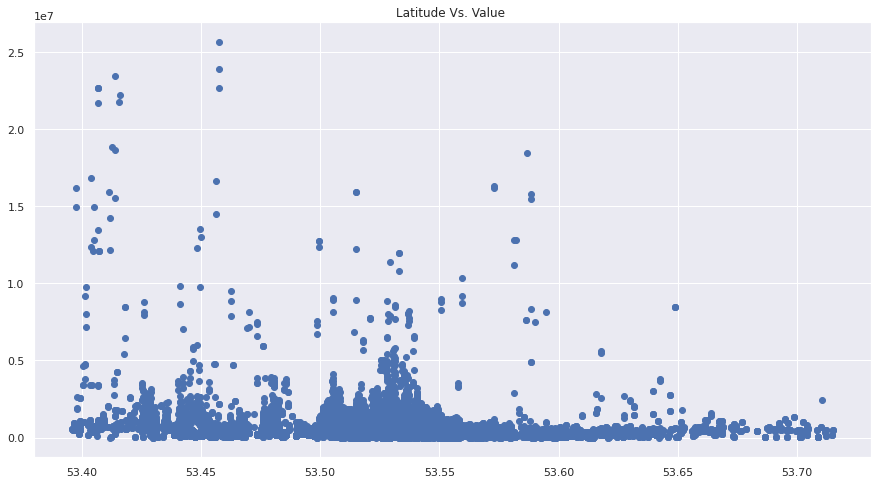

In [ ]:
plt.scatter(df_2019['Latitude'],df_2019['Assessed Value'])
plt.title('Latitude Vs. Value ')

2021 Data

Text(0.5, 0, 'Age (Years)')

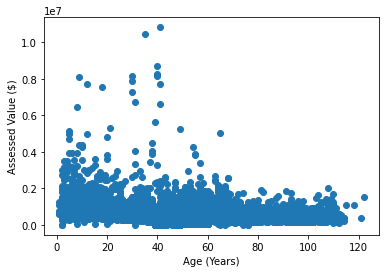

In [ ]:
plt.scatter(df_2021['Age'], df_2021['Assessed Value'])
plt.ylabel("Assessed Value ($)")
plt.xlabel('Age (Years)')


In [ ]:
df_2019_no_null=df_2019.copy()
df_2019_no_null=df_2019_no_null.dropna(subset=['Actual Year Built'])
# print(df_2019.isnull().sum())
# print(df_2019_no_null.isnull().sum())
df_2019_no_null.shape

(140753, 22)

In [ ]:
df_2021.shape

(52527, 22)

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip( df_2019['Latitude'], df_2019['Longitude'])]
geo_df = gpd.GeoDataFrame(df_2019, geometry=geometry) 

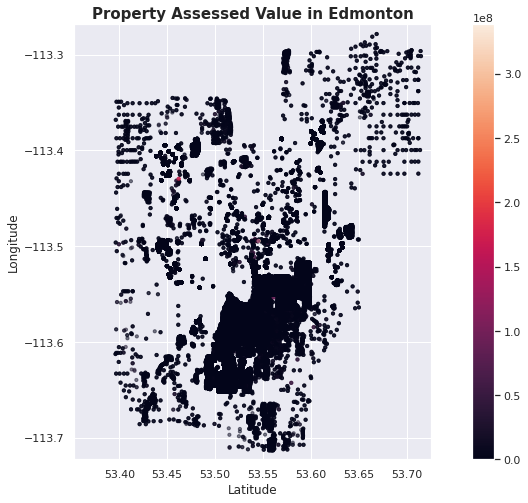

In [ ]:
# ax = plt.subplots(figsize=(16,16))
geo_df.plot(column='Assessed Value',alpha=0.5, legend=True,markersize=10)
plt.title('Property Assessed Value in Edmonton', fontsize=15,fontweight='bold')
plt.xlim(53.353050,53.725080)
plt.ylim(-113.722590,-113.268420)
plt.ylabel("Longitude")
plt.xlabel('Latitude')
plt.show()


In [ ]:
df_2019.shape

(142355, 21)

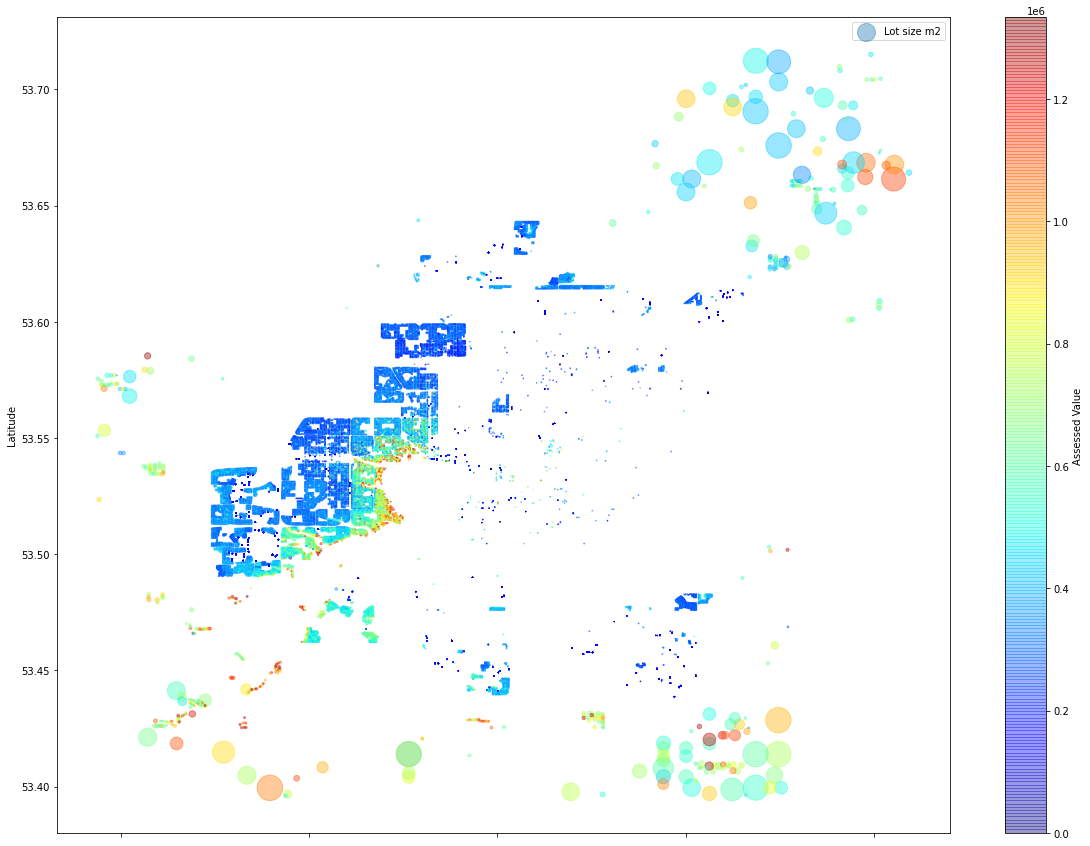

In [ ]:
import matplotlib as mat
df_removed.plot(kind = "scatter", x = "Longitude", y = "Latitude",
           s = df_removed['Lot Size']/1000, label = "Lot size m2",
           c = "Assessed Value", cmap = mat.pyplot.get_cmap("jet"),
           colorbar = True, alpha = 0.4, figsize = (20, 15))

# plt.ylabel("Latitude")
plt.xlabel('Longitude')
mat.pyplot.show()

In [ ]:
df_removed.describe()

,Assessment Year,Latitude,Longitude,Lot Size,Assessed Value,Age,Garage
count,51406.0,51406.000000,51406.000000,51406.000000,5.140600e+04,51406.000000,51406.000000
mean,2021.0,53.534597,-113.555134,1036.791429,3.234833e+05,51.487686,0.661771
std,0.0,0.044845,0.067841,13669.319800,1.862286e+05,14.999886,0.473112
min,2021.0,53.396060,-113.712580,0.195000,0.000000e+00,1.000000,0.000000
25%,2021.0,53.508752,-113.605040,256.217000,1.980000e+05,41.000000,0.000000
50%,2021.0,53.531250,-113.565120,552.613000,3.050000e+05,47.000000,1.000000
75%,2021.0,53.557987,-113.521830,651.934000,3.820000e+05,64.000000,1.000000
max,2021.0,53.715070,-113.281240,652986.985100,1.333500e+06,121.000000,1.000000


In [ ]:
# # outlier removal
# threshold = df_2019['Assessed Value'].quantile(.99)
# df_removed = df_2019[df_2019['Assessed Value'] <= threshold]
# df_replaced = df_2019.copy()
# df_replaced.loc[df_replaced['Assessed Value'] > threshold, 'Assessed Value'] = threshold

# print("Original dataframe size: ", len(df_2019), "max value:", df_2019['Assessed Value'].max())
# print("Threshold", threshold)
# print("Dataframe with removed outliers size: ", len(df_removed), "max value:",  df_removed['Assessed Value'].max())
# print("Dataframe with replaced outliers size: ", len(df_replaced), "max value:",  df_replaced['Assessed Value'].max())

Original dataframe size:  142355 max value: 25636500.0
Threshold 1460229.9999999958
Dataframe with removed outliers size:  140931 max value: 1460000.0
Dataframe with replaced outliers size:  142355 max value: 1460229.9999999958


In [ ]:
df_removed. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140931 entries, 16 to 533766
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Account Number        140931 non-null  int64  
 1   Assessment Year       140931 non-null  int64  
 2   Suite                 21843 non-null   object 
 3   House Number          138156 non-null  float64
 4   Street Name           138156 non-null  object 
 5   Legal Description     140859 non-null  object 
 6   Latitude              140908 non-null  float64
 7   Longitude             140908 non-null  float64
 8   Point Location        140908 non-null  object 
 9   Neighbourhood         140931 non-null  object 
 10  Actual Year Built     139511 non-null  float64
 11  Garage                140931 non-null  object 
 12  Zoning                140928 non-null  object 
 13  Lot Size              140925 non-null  float64
 14  Assessed Value        140931 non-null  float64
 15 

In [ ]:
print(df_2021.isnull().sum())

Account Number              0
Assessment Year             0
Suite                   15925
House Number              921
Street Name               921
Legal Description           6
Latitude                    6
Longitude                   6
Point Location              6
Neighbourhood               0
Actual Year Built         284
Garage                      0
Zoning                      2
Lot Size                    3
Assessed Value              0
Assessment Class 1          0
Assessment Class % 1        0
Assessment Class 2      21633
Assessment Class % 2    21633
Assessment Class 3      21724
Assessment Class % 3    21724
Age                       284
dtype: int64


In [ ]:
# from sklearn.preprocessing import LabelEncoder 
# from sklearn.preprocessing import OneHotEncoder
# from sklearn import preprocessing

# le = LabelEncoder()
# as_integers = le.fit_transform(df_2019['Neighbourhood']).reshape(-1,1)

# enc = preprocessing.OneHotEncoder() 
# enc.fit(as_integers)
# onehotlabels = enc.transform(as_integers).toarray()
# df_encode = df_2019.join(onehotlabels)
# print(df_encode)

AttributeError: ignored

In [ ]:
# df_2019['NeighbourhoodID']=as_integers
# df_2019

,Account Number,Assessment Year,Suite,House Number,Street Name,Legal Description,Latitude,Longitude,Point Location,Neighbourhood,...,Zoning,Lot Size,Assessed Value,Assessment Class 1,Assessment Class % 1,Assessment Class 2,Assessment Class % 2,Assessment Class 3,Assessment Class % 3,NeighbourhoodID
16,2618007,2021,NaN,10830.0,129 STREET NW,Plan: 3875P Block: 22 Lot: 8,53.55367,-113.54502,POINT (-113.54502 53.55367),WESTMOUNT,...,RF1,564.250,480500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN,220
34,9525304,2019,NaN,523.0,101 STREET NW,NW 28-51-24-4,NaN,NaN,NaN,ANTHONY HENDAY SOUTHEAST,...,AG,225537.722,918000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN,13
42,10005483,2021,NaN,3301.0,LAKEVIEW ROAD NW,NaN,53.55223,-113.69679,POINT (-113.69679 53.55223),WESTVIEW VILLAGE,...,RMH,NaN,49500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN,222
50,10039899,2019,NaN,117.0,RIDGEWAY DRIVE NW,NaN,53.50390,-113.35934,POINT (-113.35934 53.5039),MAPLE RIDGE,...,RMH,NaN,99000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN,134
52,10096491,2021,NaN,116.0,OAK WOOD ROAD NW,NaN,53.50431,-113.36335,POINT (-113.36335 53.50431),MAPLE RIDGE,...,RMH,NaN,63000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533750,2942456,2020,NaN,13543.0,124B AVENUE NW,Plan: 6013HW Block: 8 Lot: 26,53.58032,-113.56224,POINT (-113.56224 53.58032),DOVERCOURT,...,RF1,545.880,277500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN,62
533756,2944452,2021,NaN,13563.0,124A AVENUE NW,Plan: 6013HW Block: 9 Lot: 23,53.57949,-113.56345,POINT (-113.56345 53.57949),DOVERCOURT,...,RF1,645.375,328500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN,62
533760,3008588,2021,201.0,4007.0,26 AVENUE NW,Plan: 8420896 Unit: 6,53.45582,-113.40422,POINT (-113.40422 53.45582),BISSET,...,RA7,102.030,66000.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN,29
533762,3001146,2019,NaN,12615.0,108 AVENUE NW,Plan: 8420017 Unit: 3,53.55237,-113.54071,POINT (-113.54071 53.55237),WESTMOUNT,...,RA7,160.838,238500.0,RESIDENTIAL,100.0,NaN,NaN,NaN,NaN,220


In [ ]:
df_2019.shape

(0, 23)

In [ ]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142355 entries, 16 to 533766
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Account Number        142355 non-null  int64  
 1   Assessment Year       142355 non-null  int64  
 2   Suite                 21849 non-null   object 
 3   House Number          139580 non-null  float64
 4   Street Name           139580 non-null  object 
 5   Legal Description     142277 non-null  object 
 6   Latitude              142327 non-null  float64
 7   Longitude             142327 non-null  float64
 8   Point Location        142327 non-null  object 
 9   Neighbourhood         142355 non-null  object 
 10  Actual Year Built     140753 non-null  float64
 11  Garage                142355 non-null  int64  
 12  Zoning                142351 non-null  object 
 13  Lot Size              142349 non-null  float64
 14  Assessed Value        142355 non-null  float64
 15 

In [ ]:
# df_model=df_2019[['Assessment Year','Latitude','Longitude','Lot Size','Assessed Value','Age','Garage']]
# df_clean=df_model.dropna()
# print(df_clean.isnull().sum())
# df_clean.shape

Assessment Year    0
Latitude           0
Longitude          0
Lot Size           0
Assessed Value     0
Age                0
Garage             0
dtype: int64


(140732, 7)

In [ ]:
# cols = df_clean.columns
# feat_cols = cols.drop("Assessed Value")
# all_features = df_clean.loc[:, feat_cols]
# target = df_clean.loc[:, ['Assessed Value']]

Trainign size: 112585, Test size: 28147
Trainign size: 112585, Test size: 28147
Trainign size: 112586, Test size: 28146
Trainign size: 112586, Test size: 28146
Trainign size: 112586, Test size: 28146
R^2 0.19493941661243386


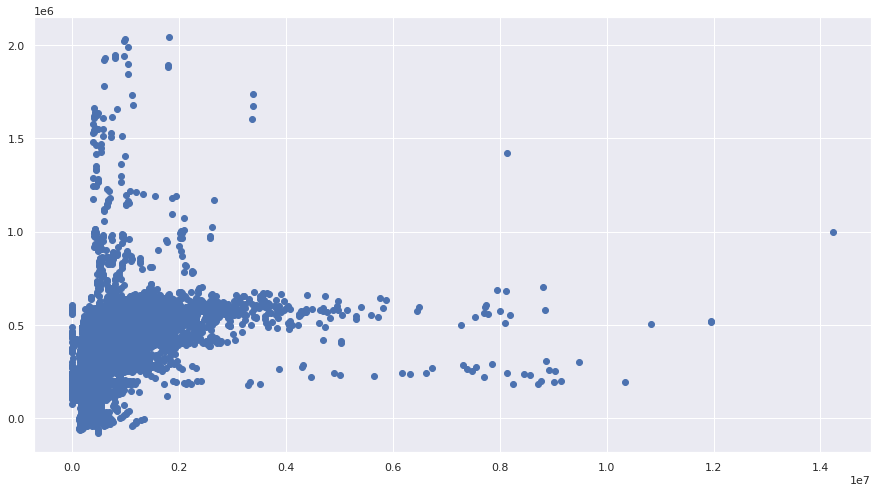

In [ ]:
# np.random.seed(200)
# from sklearn.model_selection import KFold
# kfold = KFold(n_splits=5, shuffle=True)
# preds = []
# total_label=[]
# for train_indices, test_indices in kfold.split(all_features, target):
#     train_features = all_features.iloc[train_indices]
#     train_labels = target.iloc[train_indices]

#     test_features = all_features.iloc[test_indices]
#     test_labels = target.iloc[test_indices]
#     print (f"Trainign size: {len(train_features)}, Test size: {len(test_features)}")
#     model = Ridge(alpha=0)
#     model = model.fit(train_features, train_labels)
#     preds.extend(model.predict(test_features))
#     total_label.extend(test_labels.values)

# print("R^2", r2_score(total_label, preds))
# # print("Precision:", precision_score(total_label, preds))
# # print("Recall:", recall_score(total_label, preds))
# import matplotlib.pyplot as plt
# plt.scatter(total_label, preds)
# plt.xlabel('Predictions')
# plt.ylabel('Total Labels')
# plt.show()

Trainign size: 112585, Test size: 28147


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Trainign size: 112585, Test size: 28147


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Trainign size: 112586, Test size: 28146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Trainign size: 112586, Test size: 28146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


Trainign size: 112586, Test size: 28146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R^2 0.8326872761853942


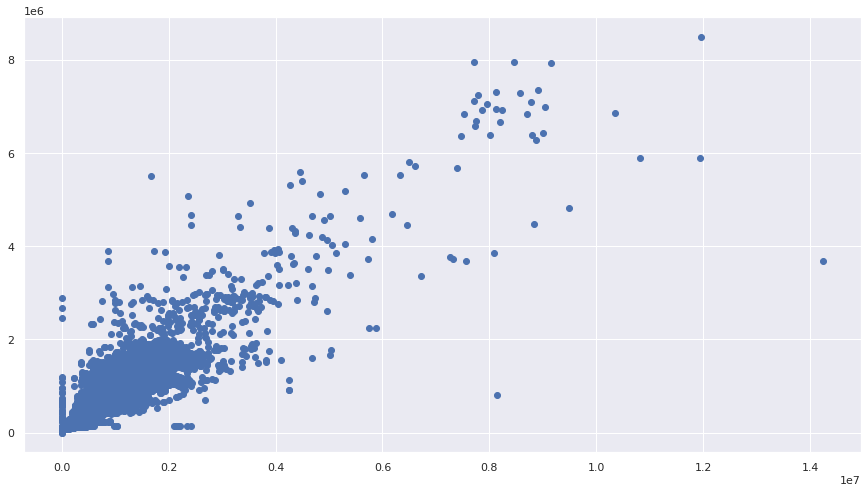

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# np.random.seed(200)
# from sklearn.model_selection import KFold
# kfold = KFold(n_splits=5, shuffle=True)
# preds = []
# total_label=[]
# for train_indices, test_indices in kfold.split(all_features, target):
#     train_features = all_features.iloc[train_indices]
#     train_labels = target.iloc[train_indices]

#     test_features = all_features.iloc[test_indices]
#     test_labels = target.iloc[test_indices]
#     print (f"Trainign size: {len(train_features)}, Test size: {len(test_features)}")
#     model = RandomForestRegressor(max_depth=8, n_estimators=100)
    
#     model = model.fit(train_features, train_labels.values)
#     preds.extend(model.predict(test_features))
#     total_label.extend(test_labels.values)

# print("R^2", r2_score(total_label, preds))
# # print("Precision:", precision_score(total_label, preds))
# # print("Recall:", recall_score(total_label, preds))
# import matplotlib.pyplot as plt
# plt.scatter(total_label, preds)
# plt.show()

In [ ]:
# # Linear regression model
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import Ridge,Lasso
# from sklearn.metrics import r2_score
# total_labels = []
# total_preds = []

# x_train, x_test, y_train, y_test = train_test_split(feat,
#                                                     target,
#                                                     test_size=0.1)

# np.random.seed(1341)
# skf = KFold(n_splits=5, shuffle=True)
# for train_indices, test_indices in skf.split(feat, target):
#     x_train = feat.iloc[train_indices, :]
#     y_train = target.iloc[train_indices]
    
#     x_test = feat.iloc[test_indices, :]
#     y_test = target.iloc[test_indices]
    
#     scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
#     x_train_scaled = scaler.fit_transform(x_train)

#     regressor = Lasso()
#     regressor = regressor.fit(x_train_scaled, y_train)
    
#     preds = regressor.predict(scaler.transform(x_test))
#     #print(y_test)
#     total_labels.extend(y_test.values.tolist())
#     total_preds.extend(list(preds))

# r2 = r2_score(total_labels, total_preds)
# print("Score:", r2)
# #print(total_labels)
# #print(accuracy_score(total_labels, total_preds))
# #print(precision_score(total_labels, total_preds))
# #print(recall_score(total_labels, total_preds))
# #print(classification_report(total_labels, total_preds))

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


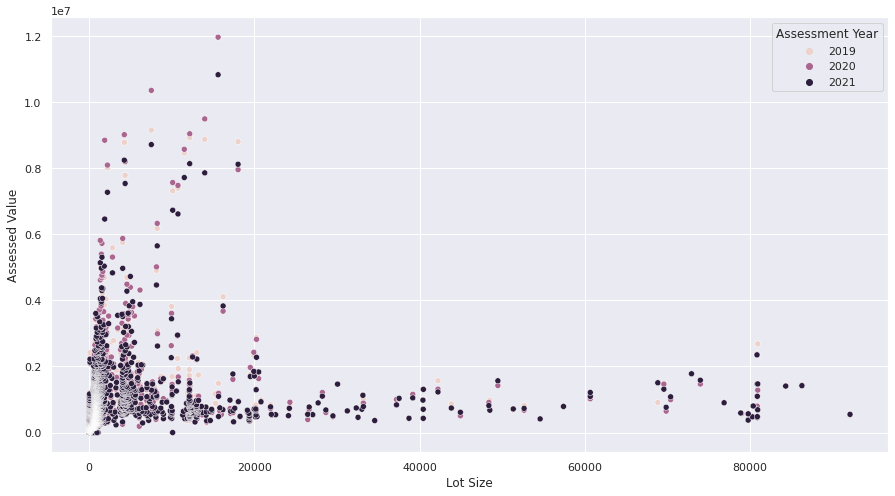

In [ ]:
df_clean.drop(df_clean[df_clean['Lot Size'] >= 100000].index, inplace = True)

sns.set(rc = {'figure.figsize':(15, 8)})
sns.scatterplot(x = "Lot Size", y = "Assessed Value", hue="Assessment Year",
                data = df_clean.groupby(['Assessment Year']).apply(lambda x: x.sort_values(by = ['Assessed Value'])))

mat.pyplot.show()


In [ ]:
# df_clean.drop(df_clean[df_clean['Assessment Year'] < 2021].index, inplace = True)
# df_clean['Assessment Year'].unique()
# # df_clean.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([2021.])

Trainign size: 112585, Test size: 28147


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Trainign size: 112585, Test size: 28147


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Trainign size: 112586, Test size: 28146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Trainign size: 112586, Test size: 28146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Trainign size: 112586, Test size: 28146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


R^2 0.8316913786719388


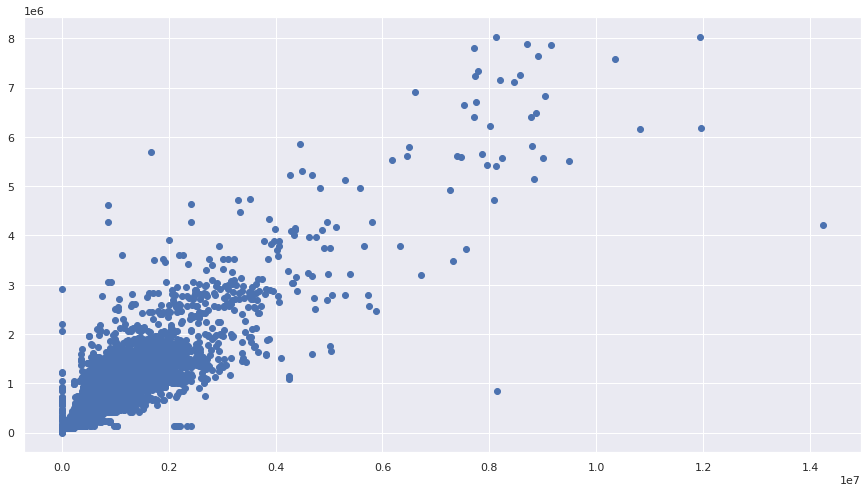

In [ ]:
# # using 2021 data
# kfold = KFold(n_splits=5, shuffle=True)
# preds = []
# total_label=[]
# for train_indices, test_indices in kfold.split(all_features, target):
#     train_features = all_features.iloc[train_indices]
#     train_labels = target.iloc[train_indices]

#     test_features = all_features.iloc[test_indices]
#     test_labels = target.iloc[test_indices]
#     print (f"Trainign size: {len(train_features)}, Test size: {len(test_features)}")
#     model = RandomForestRegressor(max_depth=8, n_estimators=100)
    
#     model = model.fit(train_features, train_labels.values)
#     preds.extend(model.predict(test_features))
#     total_label.extend(test_labels.values)

# print("R^2", r2_score(total_label, preds))
# # print("Precision:", precision_score(total_label, preds))
# # print("Recall:", recall_score(total_label, preds))
# import matplotlib.pyplot as plt
# plt.scatter(total_label, preds)
# plt.show()

Choosing featurs for prediction for 2021 data

In [ ]:
df_model=df_2021[['Assessment Year','Latitude','Longitude','Lot Size','Assessed Value','Age','Garage']]
df_clean=df_model.dropna()
print(df_model.isnull().sum())
print(df_clean.isnull().sum())
df_clean['Assessment Year'].unique()


Assessment Year      0
Latitude            10
Longitude           10
Lot Size             3
Assessed Value       0
Age                593
Garage               0
dtype: int64
Assessment Year    0
Latitude           0
Longitude          0
Lot Size           0
Assessed Value     0
Age                0
Garage             0
dtype: int64


array([2021.])

Models fo 2021 Data

In [ ]:
cols = df_clean.columns
feat_cols = cols.drop("Assessed Value")
all_features = df_clean.loc[:, feat_cols]
target = df_clean.loc[:, ['Assessed Value']]

Trainign size: 41540, Test size: 10385
Trainign size: 41540, Test size: 10385
Trainign size: 41540, Test size: 10385
Trainign size: 41540, Test size: 10385
Trainign size: 41540, Test size: 10385
R^2 0.215402279937414


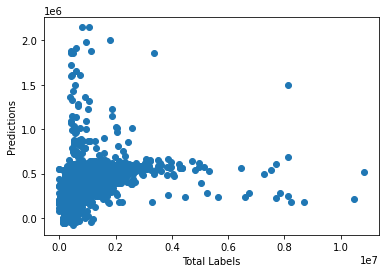

In [ ]:
# Ridge model for 2021
# Linear regression model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score
np.random.seed(200)
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)
preds = []
total_label=[]
for train_indices, test_indices in kfold.split(all_features, target):
    train_features = all_features.iloc[train_indices]
    train_labels = target.iloc[train_indices]

    test_features = all_features.iloc[test_indices]
    test_labels = target.iloc[test_indices]
    print (f"Trainign size: {len(train_features)}, Test size: {len(test_features)}")
    model = Ridge(alpha=0)
    model = model.fit(train_features, train_labels)
    preds.extend(model.predict(test_features))
    total_label.extend(test_labels.values)

print("R^2", r2_score(total_label, preds))
# print("Precision:", precision_score(total_label, preds))
# print("Recall:", recall_score(total_label, preds))
import matplotlib.pyplot as plt
plt.scatter(total_label, preds)
plt.xlabel('Total Labels')
plt.ylabel('Predictions')
plt.show()

Trainign size: 41540, Test size: 10385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Trainign size: 41540, Test size: 10385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Trainign size: 41540, Test size: 10385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Trainign size: 41540, Test size: 10385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Trainign size: 41540, Test size: 10385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R^2 0.7059900266979637


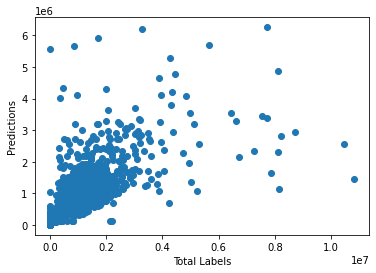

In [ ]:
# Model Random Forest Regressor 2021 data
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
np.random.seed(200)
kfold = KFold(n_splits=5, shuffle=True)
preds = []
total_label=[]
for train_indices, test_indices in kfold.split(all_features, target):
    train_features = all_features.iloc[train_indices]
    train_labels = target.iloc[train_indices]

    test_features = all_features.iloc[test_indices]
    test_labels = target.iloc[test_indices]
    print (f"Trainign size: {len(train_features)}, Test size: {len(test_features)}")
    model = RandomForestRegressor(max_depth=8, n_estimators=100)
    
    model = model.fit(train_features, train_labels.values)
    preds.extend(model.predict(test_features))
    total_label.extend(test_labels.values)

print("R^2", r2_score(total_label, preds))
# print("Precision:", precision_score(total_label, preds))
# print("Recall:", recall_score(total_label, preds))
import matplotlib.pyplot as plt
plt.scatter(total_label, preds)
plt.xlabel('Total Labels')
plt.ylabel('Predictions')
plt.show()

Trainign size: 41540, Test size: 10385


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Trainign size: 41540, Test size: 10385


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Trainign size: 41540, Test size: 10385


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Trainign size: 41540, Test size: 10385


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Trainign size: 41540, Test size: 10385


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


R^2 0.7242957618825119


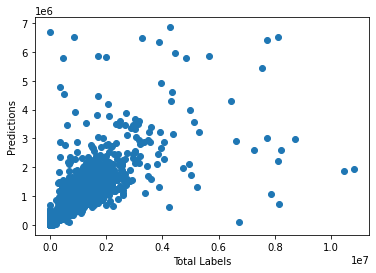

In [ ]:
#Model Gradient Boosting Regressor unsing 2021 Data
from sklearn import ensemble
kfold = KFold(n_splits=5, shuffle=True)
np.random.seed(200)
preds = []
total_label=[]
for train_indices, test_indices in kfold.split(all_features, target):
    train_features = all_features.iloc[train_indices]
    train_labels = target.iloc[train_indices]

    test_features = all_features.iloc[test_indices]
    test_labels = target.iloc[test_indices]
    print (f"Trainign size: {len(train_features)}, Test size: {len(test_features)}")
    model3 = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 8, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
    
    model3 = model3.fit(train_features, train_labels.values)
    preds.extend(model3.predict(test_features))
    total_label.extend(test_labels.values)

print("R^2", r2_score(total_label, preds))
# print("Precision:", precision_score(total_label, preds))
# print("Recall:", recall_score(total_label, preds))
import matplotlib.pyplot as plt
plt.scatter(total_label, preds)
plt.xlabel('Total Labels')
plt.ylabel('Predictions')
plt.show()

Text(0.5, 1.0, 'Age Vs. Value')

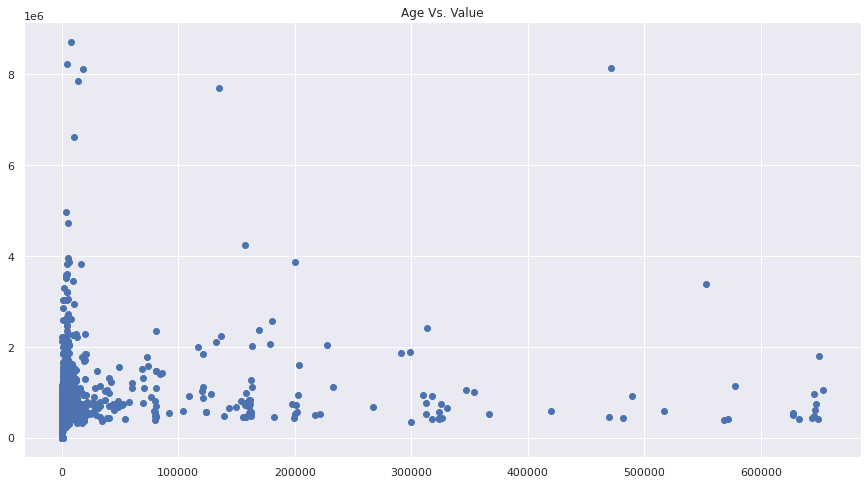

In [ ]:
plt.scatter(df_clean['Lot Size'], df_clean['Assessed Value'])
plt.title('Age Vs. Value')

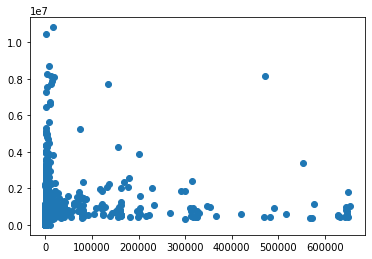

In [ ]:
df_clean_copy = df_clean.copy()
df_clean_copy[df_clean_copy['Lot Size'] < 100000]
df_clean_copy[df_clean_copy['Assessed Value'] < 1000000]
plt.scatter(df_clean_copy['Lot Size'], df_clean_copy['Assessed Value'])

In [ ]:
df_clean_copy[df_clean_copy['Assessed Value'] < 2000000]
df_clean_copy.shape

(51925, 7)

outlier removal

In [ ]:
# outlier removal
threshold = df_clean_copy['Assessed Value'].quantile(.99)
df_removed = df_clean_copy[df_clean_copy['Assessed Value'] <= threshold]
# df_replaced = df_clean_copy.copy()
# df_replaced.loc[df_replaced['Assessed Value'] > threshold, 'Assessed Value'] = threshold

print("Original dataframe size: ", len(df_2019), "max value:", df_clean_copy['Assessed Value'].max())
print("Threshold", threshold)
print("Dataframe with removed outliers size: ", len(df_removed), "max value:",  df_removed['Assessed Value'].max())
# print("Dataframe with replaced outliers size: ", len(df_replaced), "max value:",  df_replaced['Assessed Value'].max())

Original dataframe size:  601680 max value: 10823500.0
Threshold 1333500.0
Dataframe with removed outliers size:  51406 max value: 1333500.0


Running Random Forest Regressor after removing outliers from assesed value and reducing lot size to <100000 m2

In [ ]:
cols1 = df_removed.columns
feat_cols = cols1.drop("Assessed Value")
all_features = df_removed.loc[:, feat_cols]
target = df_removed.loc[:, ['Assessed Value']]

Trainign size: 41124, Test size: 10282


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Trainign size: 41125, Test size: 10281


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Trainign size: 41125, Test size: 10281


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Trainign size: 41125, Test size: 10281


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Trainign size: 41125, Test size: 10281


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R^2 0.8594609290355019
MSE 4873951301.055163


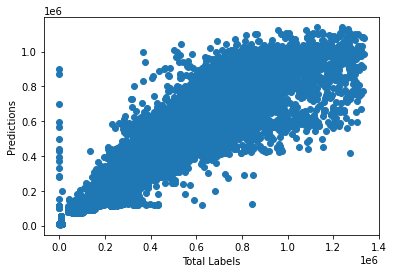

In [ ]:
# using 2021 data
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
np.random.seed(200)
kfold = KFold(n_splits=5, shuffle=True)
preds = []
total_label=[]
for train_indices, test_indices in kfold.split(all_features, target):
    train_features = all_features.iloc[train_indices]
    train_labels = target.iloc[train_indices]

    test_features = all_features.iloc[test_indices]
    test_labels = target.iloc[test_indices]
    print (f"Trainign size: {len(train_features)}, Test size: {len(test_features)}")
    model = RandomForestRegressor(max_depth=8, n_estimators=100)
    
    model = model.fit(train_features, train_labels.values)
    preds.extend(model.predict(test_features))
    total_label.extend(test_labels.values)

print("R^2", r2_score(total_label, preds))
print("MSE", mean_squared_error(total_label, preds))
# print("Precision:", precision_score(total_label, preds))
# print("Recall:", recall_score(total_label, preds))
import matplotlib.pyplot as plt
plt.scatter(total_label, preds)
plt.xlabel('Total Labels')
plt.ylabel('Predictions')
plt.show()

Trainign size: 17204, Test size: 4302


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Trainign size: 17205, Test size: 4301


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Trainign size: 17205, Test size: 4301


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Trainign size: 17205, Test size: 4301


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Trainign size: 17205, Test size: 4301


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


R^2 0.7120335792316572


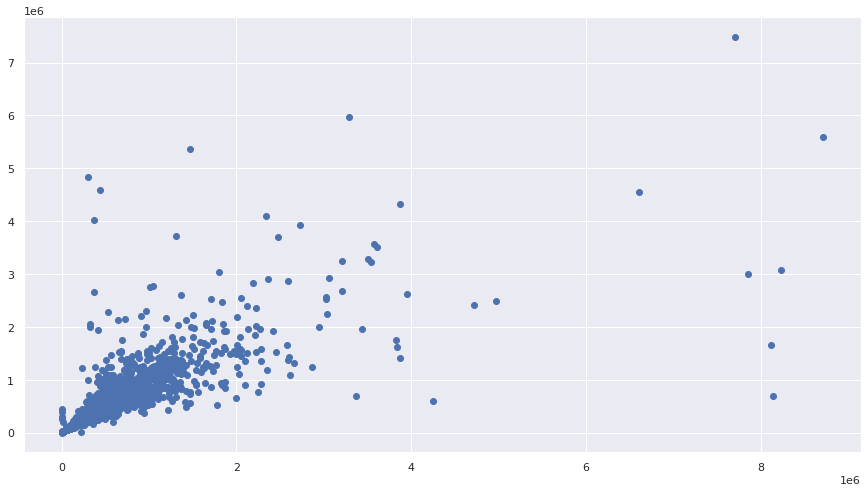

In [ ]:
from sklearn import ensemble
kfold = KFold(n_splits=5, shuffle=True)
np.random.seed(200)
preds = []
total_label=[]
for train_indices, test_indices in kfold.split(all_features, target):
    train_features = all_features.iloc[train_indices]
    train_labels = target.iloc[train_indices]

    test_features = all_features.iloc[test_indices]
    test_labels = target.iloc[test_indices]
    print (f"Trainign size: {len(train_features)}, Test size: {len(test_features)}")
    model3 = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 8, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
    
    model3 = model3.fit(train_features, train_labels.values)
    preds.extend(model3.predict(test_features))
    total_label.extend(test_labels.values)

print("R^2", r2_score(total_label, preds))
# print("Precision:", precision_score(total_label, preds))
# print("Recall:", recall_score(total_label, preds))
import matplotlib.pyplot as plt
plt.scatter(total_label, preds)
plt.show()